<a href="https://colab.research.google.com/github/amorenor1/Prueba/blob/main/07MBID_Pr%C3%A1ctica_1_Moreno_Romero_Alejandra_Carolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>PRÁCTICA 1: APRENDIZAJE NO SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Alejandra Carolina Moreno Romero

**Usuario VIU:** amorenor@student.universidadviu.com

---
# Resumen
---

Se inició con una exploración de datos, donde se identificaron tipos de variables, se calcularon estadísticas descriptivas, se verificaron duplicados y valores nulos, y se seleccionaron columnas numéricas, además de identificar outliers mediante boxplots e histogramas. Posteriormente, se llevó a cabo un análisis de características que incluyó el análisis de correlación y la normalización de los datos. En la fase de clustering, se aplicaron y compararon cuatro algoritmos de agrupamiento no supervisado: K-means, Agrupamiento Jerárquico Aglomerativo, DBSCAN y GMM, visualizando y analizando el comportamiento de los clusters formados por cada técnica. Finalmente, se discutieron los resultados obtenidos, justificando la elección del algoritmo K-means en función de la separación de los clusters y las características de los datos.

---
# Inicialización
---

In [ ]:
# Imports generales
from google.colab import files
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import io
import math

seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles por el profesor.
# OJO: En los experimentos estocásticos que requieran varias iteraciones con distintas semillas, podéis incorporarla como seed+1, seed+2, etc.

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [ ]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
dengue_train = upload_files()
print(dengue_train.shape)
dengue_train.head()

Saving dengue_features_train.csv to dengue_features_train (2).csv
User uploaded file "dengue_features_train (2).csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


---
# Exploración
---

## Tipo de variables

Inicialmente es importante, conocer el tipo y la cantidad de variables con las que se trabajará.

In [ ]:
# Información general del dataset
dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

## Estadísticas descriptivas

Es una buena práctica obtener las estadísticas generales de un dataset, para ir comprendiendo el comportamiento de los datos o que tan dispersos están.

In [ ]:
# Estadísticos del dataset
dengue_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weekofyear'].plot(kind='hist', bins=20, title='weekofyear')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ndvi_ne'].plot(kind='hist', bins=20, title='ndvi_ne')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ndvi_nw'].plot(kind='hist', bins=20, title='ndvi_nw')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='year', y='weekofyear', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='weekofyear', y='ndvi_ne', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ndvi_ne', y='ndvi_nw', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ndvi_nw', y='ndvi_se', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['weekofyear']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('weekofyear')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['ndvi_ne']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('ndvi_ne')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['ndvi_nw']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('ndvi_nw')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['ndvi_se']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('ndvi_se')

from matplotlib import pyplot as plt
_df_12['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['weekofyear'].plot(kind='line', figsize=(8, 4), title='weekofyear')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['ndvi_ne'].plot(kind='line', figsize=(8, 4), title='ndvi_ne')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['ndvi_nw'].plot(kind='line', figsize=(8, 4), title='ndvi_nw')
plt.gca().spines[['top', 'right']].set_visible(False)

En base a las estadísticas generales obtenidas, podemos ir prestando mayor atención a las instancias que tengan una varianza alta, ya que esto podría advertir presencia de outliers.
Adicional, google colab a creado una herramienta que proporciona automáticamente unos gráficos recomendados para el dataset

## Verificación duplicados

Es importante verificar si hay duplicados, en caso de que haya se analiza que procedimiento aplicar a esos duplicados

In [ ]:
# Verificar duplicados existentes
dengue_train[dengue_train.duplicated(keep=False)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


## Identificación de valores nulos

Valores nulos por columna:
city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c          

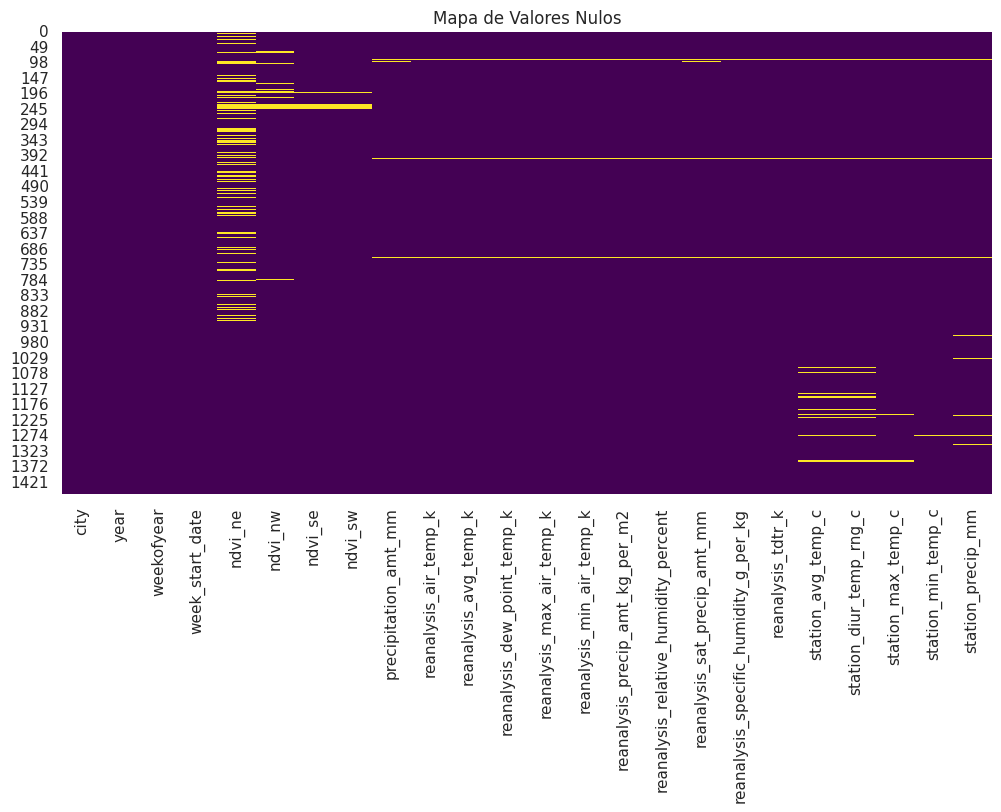

In [ ]:
# Identificar valores nulos por columna
print("Valores nulos por columna:")
print(dengue_train.isnull().sum())

# Visualización de valores nulos
plt.figure(figsize=(12,6))
sns.heatmap(dengue_train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

Se decide eliminar los valores nulos

In [ ]:
# Eliminar valores nulos
dengue_train = dengue_train.dropna()

## Selección de columnas numéricas

Es necesario identificar todas las columnas numéricas que tenemos en el dataset.

In [ ]:
# Definir las columnas numéricas que queremos analizar
columnas_numericas = [
    'year',
    'weekofyear',
    'ndvi_ne',
    'ndvi_nw',
    'ndvi_se',
    'ndvi_sw',
    'precipitation_amt_mm',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent',
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_tdtr_k',
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'station_precip_mm'
]

# Verificar que todas las columnas existan en el DataFrame
for col in columnas_numericas:
    if col not in dengue_train.columns:
        print(f"¡Atención! La columna '{col}' no se encontró en el DataFrame.")


## Identificación de outliers

Para identificar los outliers, se utilizará 3 técnicas
1. Rango intercuartilico
2. Gráficos Bloxplot
3. Histogramas

In [ ]:
# Función para identificar outliers
def encontrar_outliers(columna):
    Q1 = dengue_train[columna].quantile(0.25)
    Q3 = dengue_train[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dengue_train[(dengue_train[columna] < limite_inferior) | (dengue_train[columna] > limite_superior)][columna]
    return outliers

# Crear un diccionario para almacenar los outliers por columna
outliers_dict = {}

for col in columnas_numericas:
    outliers = encontrar_outliers(col)
    outliers_dict[col] = outliers
    print(f"\nOutliers en '{col}':")
    print(outliers)


Outliers en 'year':
Series([], Name: year, dtype: int64)

Outliers en 'weekofyear':
Series([], Name: weekofyear, dtype: int64)

Outliers en 'ndvi_ne':
189   -0.29020
519   -0.28700
723   -0.40625
821   -0.30840
860   -0.27610
929   -0.32140
Name: ndvi_ne, dtype: float64

Outliers en 'ndvi_nw':
658   -0.2528
781   -0.2498
861   -0.4561
919   -0.3096
922   -0.2153
Name: ndvi_nw, dtype: float64

Outliers en 'ndvi_se':
714    -0.015533
944     0.406714
948     0.404843
953     0.455380
1002    0.443800
1015    0.410267
1067    0.414929
1108    0.424943
1169    0.403112
1261    0.473400
1265    0.437743
1316    0.408700
1358    0.436914
1370    0.427686
1410    0.443357
1413    0.538314
1426    0.410614
Name: ndvi_se, dtype: float64

Outliers en 'ndvi_sw':
553    -0.022486
554    -0.063457
989     0.438843
998     0.429071
1001    0.444400
1002    0.546017
1008    0.441571
1067    0.469700
1108    0.432443
1110    0.419043
1198    0.441343
1216    0.473143
1261    0.493443
1271    0.427600

### Boxplots

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

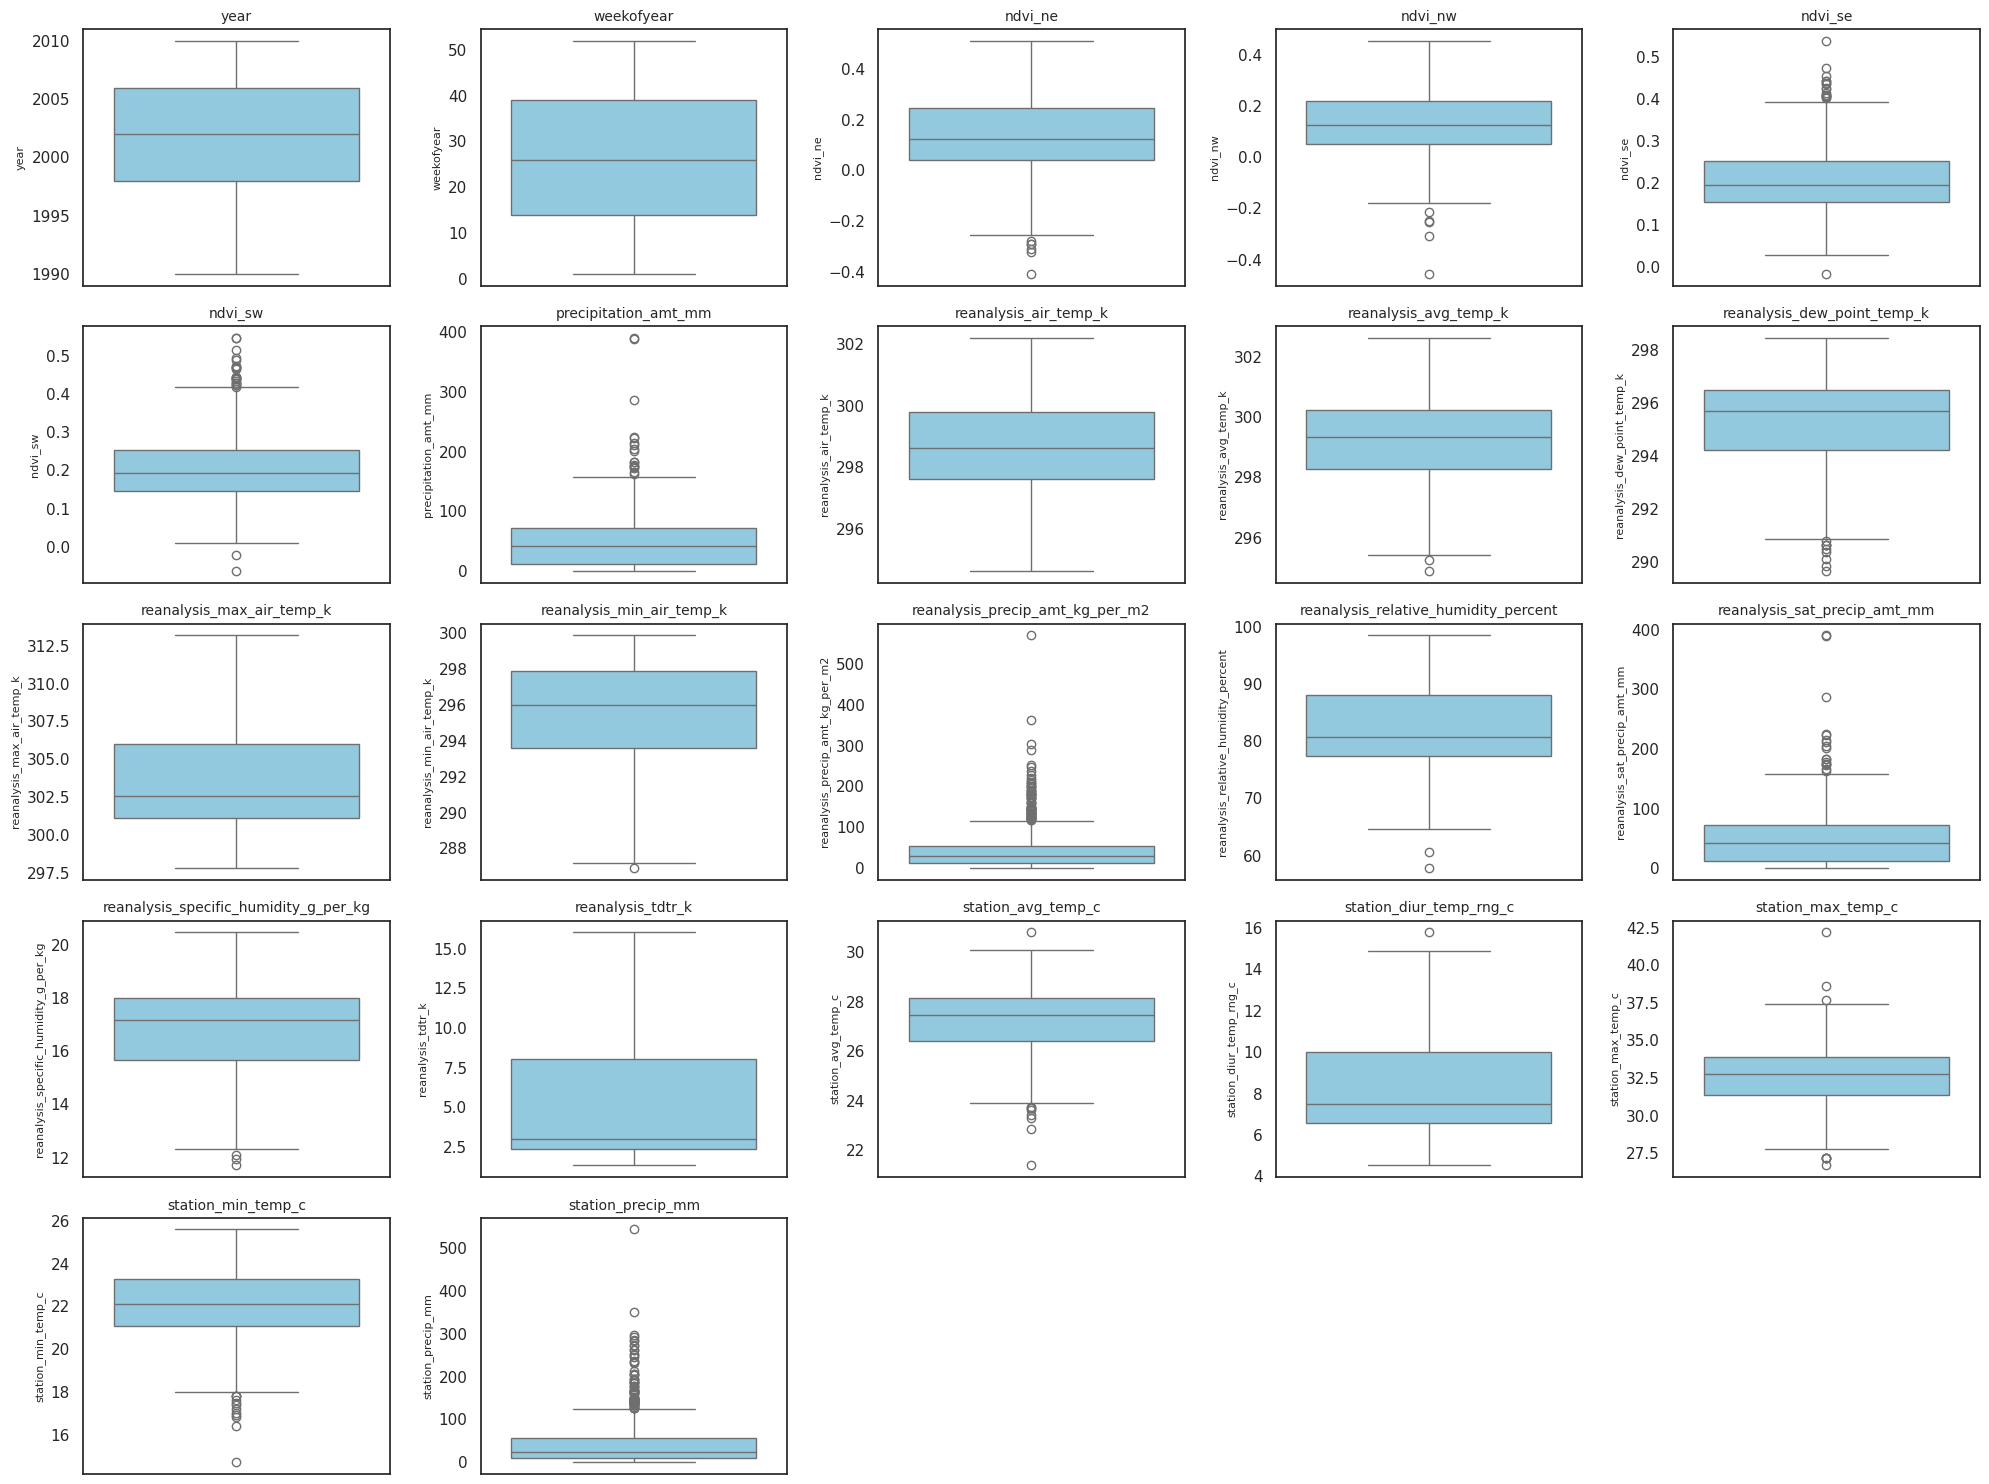

In [ ]:
# Función para crear boxplots
def plot_boxplots(data, cols):
    n_vars = len(cols)
    n_cols = 5
    n_rows = math.ceil(n_vars / n_cols)

    plt.figure(figsize=(n_cols * 4, n_rows * 3))

    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(f'{col}', fontsize=10)
        plt.ylabel(col, fontsize=8)
        plt.xlabel('')
        plt.xticks([])

    plt.tight_layout()
    plt.show()

plot_boxplots(dengue_train, columnas_numericas)

### Histogramas


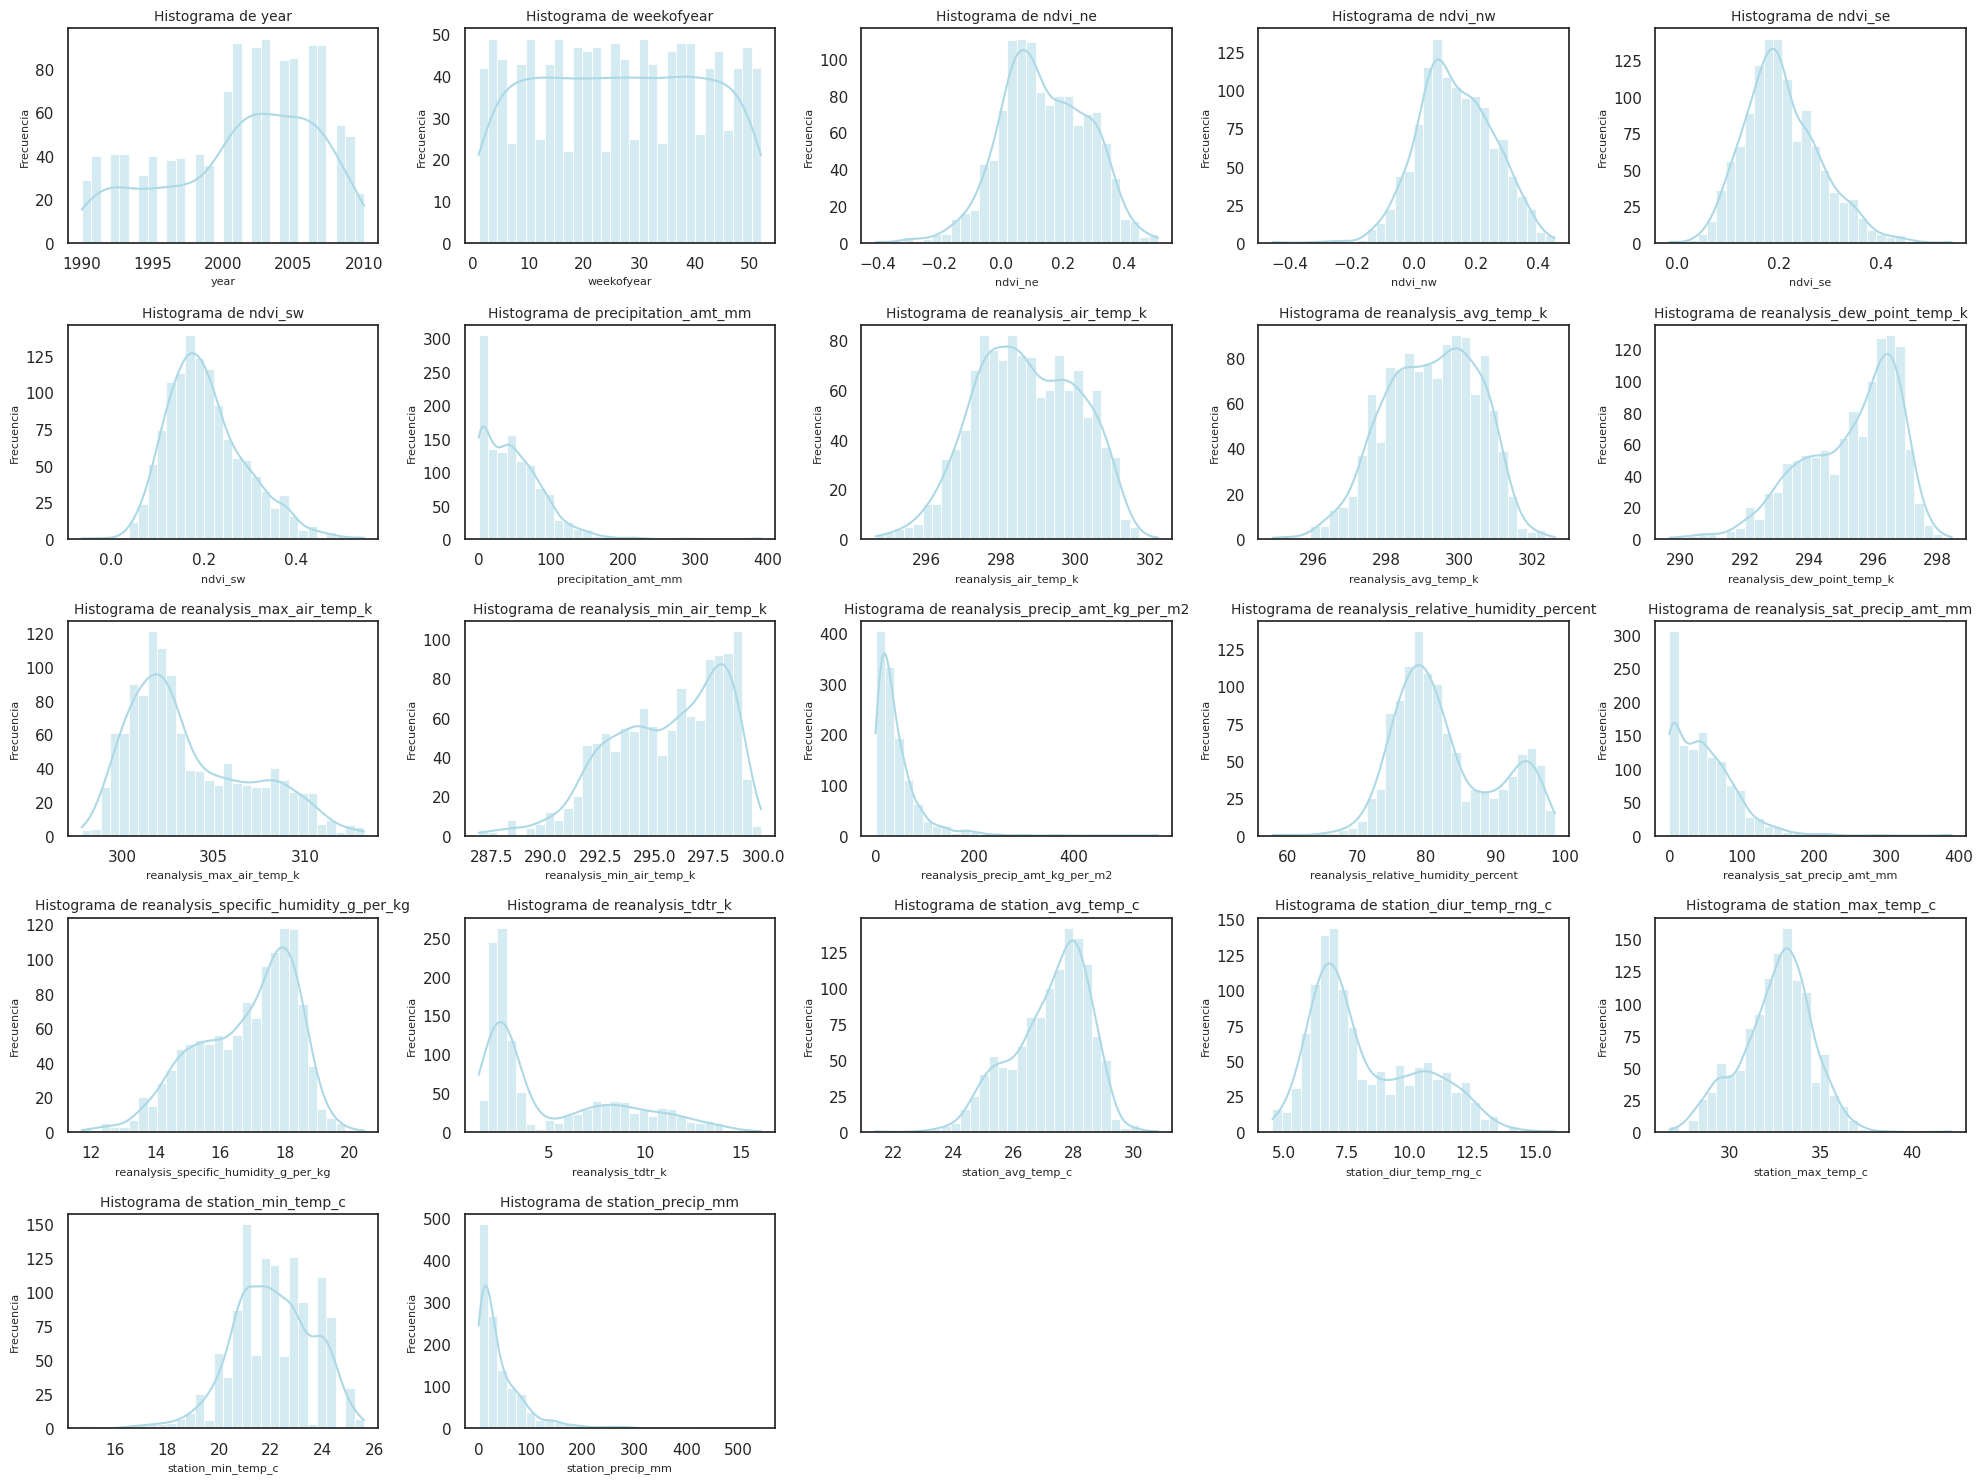

In [ ]:
# Función para crear histogramas
def plot_histograms(data, cols):
    n_vars = len(cols)
    n_cols = 5
    n_rows = math.ceil(n_vars / n_cols)

    plt.figure(figsize=(n_cols * 4, n_rows * 3))

    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], bins=30, kde=True, color='lightblue')  # KDE para la suavización
        plt.title(f'Histograma de {col}', fontsize=10)
        plt.ylabel('Frecuencia', fontsize=8)
        plt.xlabel(col, fontsize=8)

    plt.tight_layout()
    plt.show()

plot_histograms(dengue_train, columnas_numericas)

Se ha analizado los resultados de outliers, y se toma la decisión de no eliminarlos por el momento debido a que podriamos perder información necesaria

---
# Características
---

## Análisis de correlación

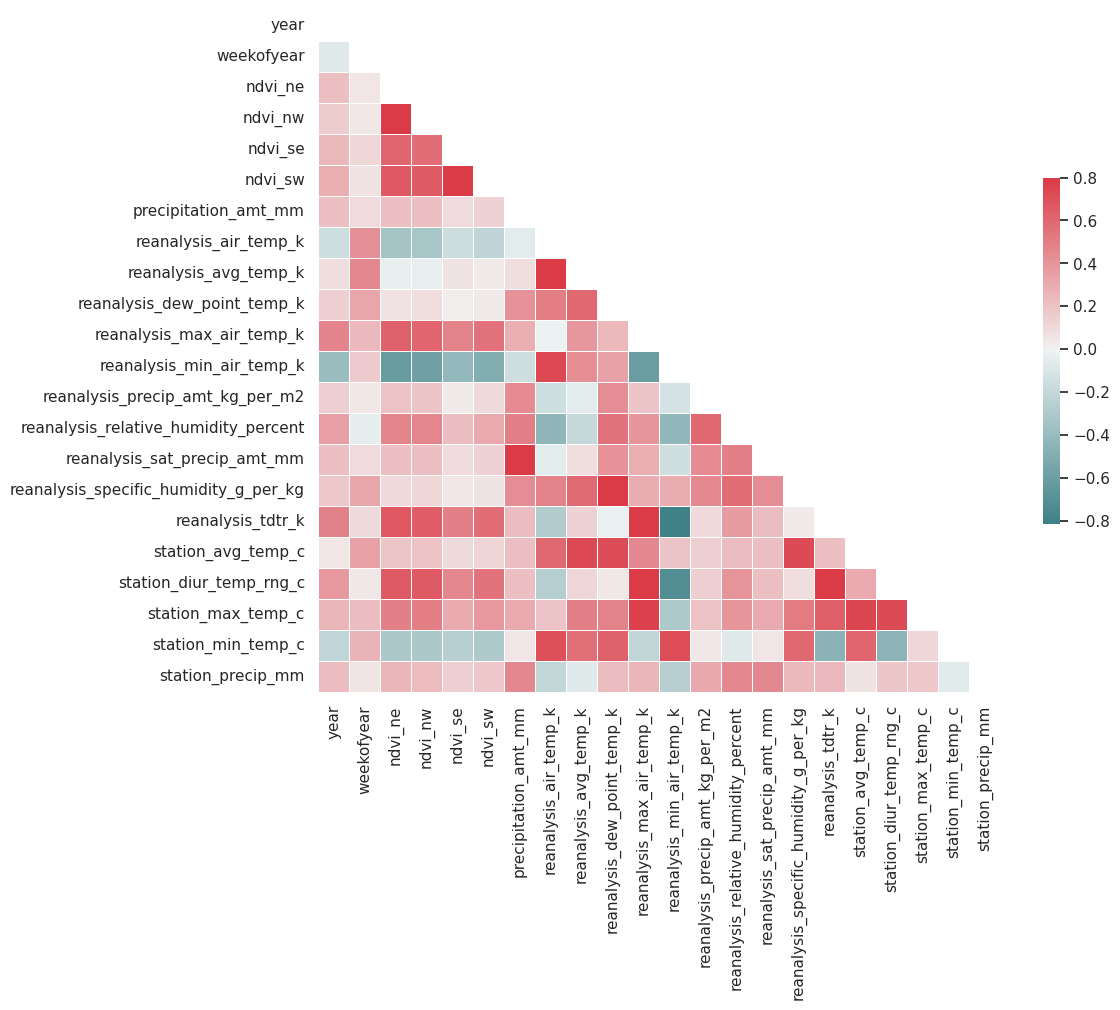

In [ ]:
# Crear la matriz de correlación
correlacion = dengue_train.select_dtypes(include=np.number).corr()

# Crear una máscara para el triángulo superior
mask = np.zeros_like(correlacion, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Nombres de las columnas (para usarlas como etiquetas en los ejes)
names = correlacion.columns

# Configurar estilo de Seaborn
sns.set(style="white")

# Configurar la figura de Matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar un colormap personalizado
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Dibujar el mapa de calor con la máscara y relación de aspecto corregida
sns.heatmap(correlacion, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear la matriz de correlación
correlacion = dengue_train.select_dtypes(include=np.number).corr()

# Establecer el umbral de correlación
threshold = 0.9

# Mantener un registro de las columnas a eliminar y las ya seleccionadas
to_drop = set()
selected = set()

# Iterar sobre las columnas y buscar correlaciones altas
for column in correlacion.columns:
    # Solo analizamos si la columna no ha sido seleccionada o eliminada previamente
    if column not in to_drop:
        # Obtenemos las correlaciones de la columna actual
        high_corr_columns = correlacion[column][correlacion[column].abs() > threshold].index

        # Si hay más de una columna correlacionada, eliminamos todas excepto una
        if len(high_corr_columns) > 1:
            for col in high_corr_columns:
                if col != column:
                    to_drop.add(col)
            selected.add(column)

# Evitar eliminar todas las columnas
if len(to_drop) >= len(correlacion.columns) - 1:
    print("Demasiadas columnas para eliminar. Manteniendo columnas representativas.")
    to_drop = to_drop - selected  # Mantener al menos una columna de cada grupo correlacionado

print("Columnas a eliminar por alta correlación:", list(to_drop))

# Comprobar si hay columnas a eliminar
if to_drop:
    dengue_train = dengue_train.drop(columns=list(to_drop))
    final_columns = dengue_train.shape[1]
    print(f"Columnas eliminadas: {len(to_drop)}. Dataset actualizado. Columnas restantes: {final_columns}.")
else:
    print("No hay columnas para eliminar.")


Columnas a eliminar por alta correlación: ['reanalysis_tdtr_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg']
Columnas eliminadas: 3. Dataset actualizado. Columnas restantes: 21.


***Explicación de la eliminación***

* **Reanalysis_specific_humidity_g_per_kg**. Tiene una alta
correlación con la humedad relativa media reanalysis_relative_humidity_percent), una está medida en porcentaje y otra en gramos por kilogramo.

* **Eliminación de reanalysis_sat_precip_amt_mm**. Correlacionada con otras variables que miden la precipitación, como station_precip_mm (precipitación medida en estaciones meteorológicas) y reanalysis_precip_amt_kg_per_m2 (precipitación por reanálisis).

* **Eliminación de reanalysis_tdtr_k**. Correlacionado con el rango de temperatura diurna medido en estaciones meteorológicas (station_diur_temp_rng_c).


## Normalización

La herramienta, Min-Max scaling escala los datos en un rango de valores, típicamente de 0 a 1. En este caso se lo usa porque se quiere conservar las relaciones de distribución entre los valores originales, pero en una escala uniforme.

In [ ]:
# Inicializar el escalador Min-Max
min_max_scaler = MinMaxScaler()

# Se realiza este paso ya que, algunas columnas fueron eliminadas en el paso anterior
columnas_numericas = [col for col in columnas_numericas if col in dengue_train.columns]

# Aplicar el escalado Min-Max
dengue_train_scaled = dengue_train.copy()
dengue_train_scaled[columnas_numericas] = min_max_scaler.fit_transform(dengue_train[columnas_numericas])

print("Escalado Min-Max completado. Dataset normalizado (rango de 0 a 1):")
dengue_train_scaled.head()


Escalado Min-Max completado. Dataset normalizado (rango de 0 a 1):


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,0.0,0.333333,1990-04-30,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,...,0.314680,0.129870,0.692308,0.056091,0.381614,0.430091,0.210393,0.174194,0.486239,0.029450
1,sj,0.0,0.352941,1990-05-07,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,...,0.489213,0.201299,0.730769,0.031446,0.479668,0.565350,0.163498,0.322581,0.688073,0.015829
2,sj,0.0,0.372549,1990-05-14,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,...,0.657583,0.175325,0.800000,0.045749,0.594415,0.565350,0.173638,0.354839,0.743119,0.076201
3,sj,0.0,0.392157,1990-05-21,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,...,0.643471,0.233766,0.776923,0.024365,0.552387,0.645897,0.198986,0.425806,0.788991,0.007362
4,sj,0.0,0.411765,1990-05-28,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,...,0.701541,0.266234,0.815385,0.021385,0.555396,0.802432,0.429658,0.535484,0.844037,0.010676


---
# Clustering
---

## K-Means

Para determinar el número adecuado de cluster que se va a utilizar, utilizaremos el método del codo

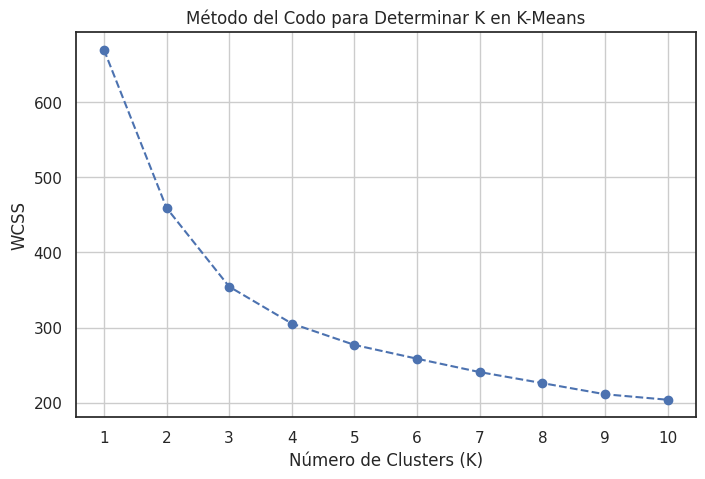

In [ ]:
# Seleccionamos las columnas numéricas normalizadas
X = dengue_train_scaled[columnas_numericas]

# Determinamos el número óptimo de clusters usando el método del codo
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualizar el método del codo para elegir el mejor número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar K en K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Según lo que se observa en el gráfico, el número de clusters adecuados debería ser 3, ya que, en este punto cambia de dirección la curva

In [ ]:
# Definir el número óptimo de clusters
optimal_k = 3

# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Añadir los labels al dataset original
dengue_train_scaled['KMeans_Labels'] = kmeans_labels


## Agrupamiento Jerárquico Aglomerativo

Para elegir el número adecuado de clusters para este algoritmo, nos ayudaremos de una dendograma

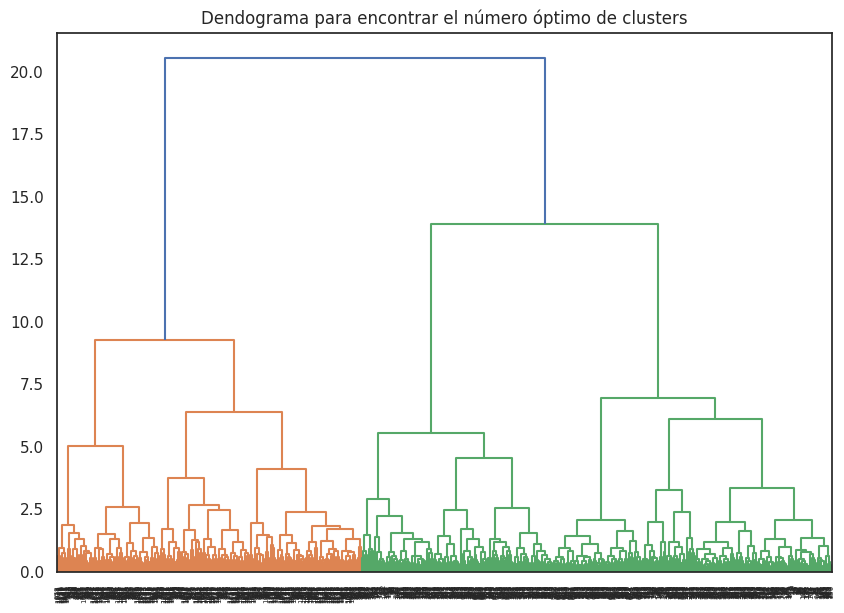

In [ ]:
# Crear el dendograma para visualizar el corte óptimo
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendograma para encontrar el número óptimo de clusters')
plt.show()

Basados en la lectura del dendograma, se lo realizará en el eje X del 15 aproximadamente, debido a que en este punto las líneas verticales son mas largas y se nota una separación clara entre estas dos agrupaciones, teniendo como **n_clusters_optimo = 2**

In [ ]:
# Definir el número óptimo de clusters según las lineas mas largas del dendograma
n_clusters_optimo = 2

# Aplicar Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters_optimo, metric='euclidean', linkage='ward')
clusters_agglo = agglomerative.fit_predict(X)

# Agregar los clusters a tu dataset
dengue_train_scaled['Cluster_Agglomerative'] = clusters_agglo

## DBSCAN

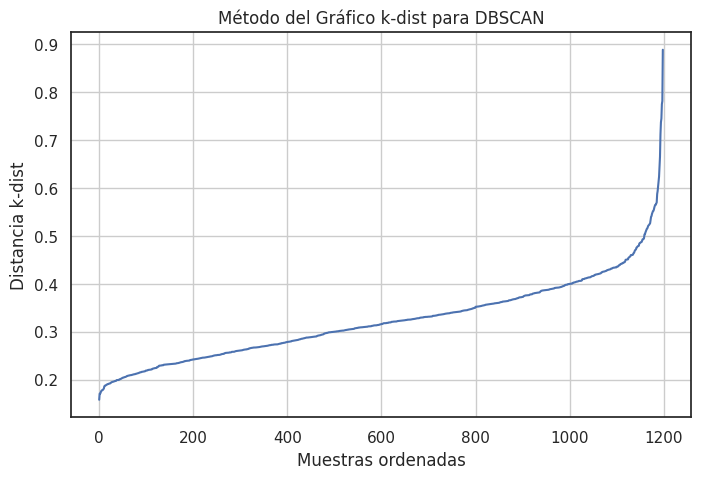

In [ ]:
# Encontrar los vecinos mas cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:,4], axis=0)

# Graficar el algoritmo
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Método del Gráfico k-dist para DBSCAN')
plt.xlabel('Muestras ordenadas')
plt.ylabel('Distancia k-dist')
plt.grid(True)
plt.show()


El gráfico k-dist nos ayuda a elegir el valor de epsilum

In [ ]:
# Definir los parámetros de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Añadir los labels al dataset original
dengue_train_scaled['DBSCAN_Labels'] = dbscan_labels


## GMM

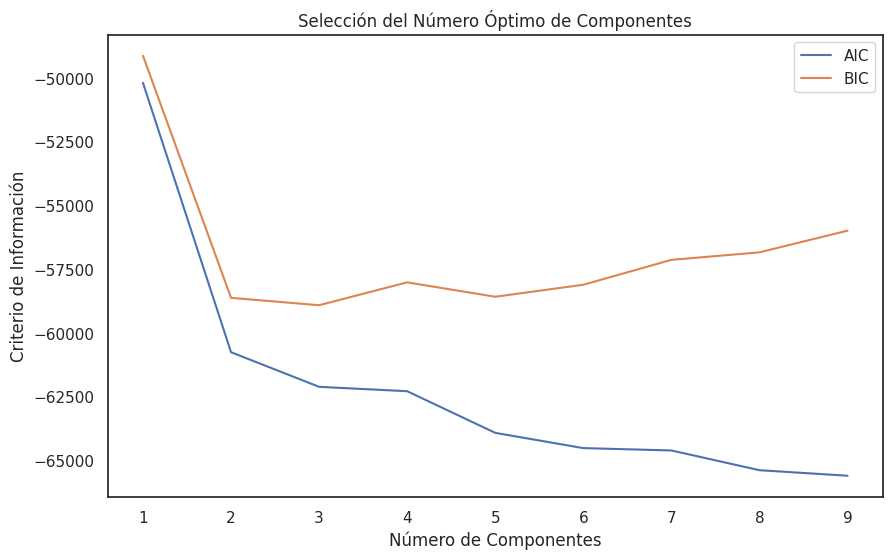

In [ ]:
# Rango de componentes a evaluar
n_components_range = range(1, 10) # este rango depende de la complejidad de los datos
aic = []
bic = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X)
    aic.append(gmm.aic(X))
    bic.append(gmm.bic(X))

# Graficar AIC y BIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.xlabel('Número de Componentes')
plt.ylabel('Criterio de Información')
plt.title('Selección del Número Óptimo de Componentes')
plt.legend()
plt.show()


En base a la gráfica de BIC, podemos elegir:

* Simplicidad (BIC): Se elige 2 componentes. BIC penaliza más la complejidad, y aquí parece sugerir que un modelo simple de 2 componentes es adecuado.

* Mayor ajuste (AIC): Se puede elegir 3 o 4 componentes, ya que AIC sigue disminuyendo y penaliza menos la complejidad que BIC.

In [ ]:
# Aplicar Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X)

# Agregar los clusters al dataset
dengue_train_scaled['Cluster_GMM'] = clusters_gmm

Se probó con n_componentes = 2, 3 y 4. Para determinar cual es el mejor, se eligió el **n_componente = 3**, ya que, dió como resultado un mejor ajuste del modelo

## Visualización de Resultados

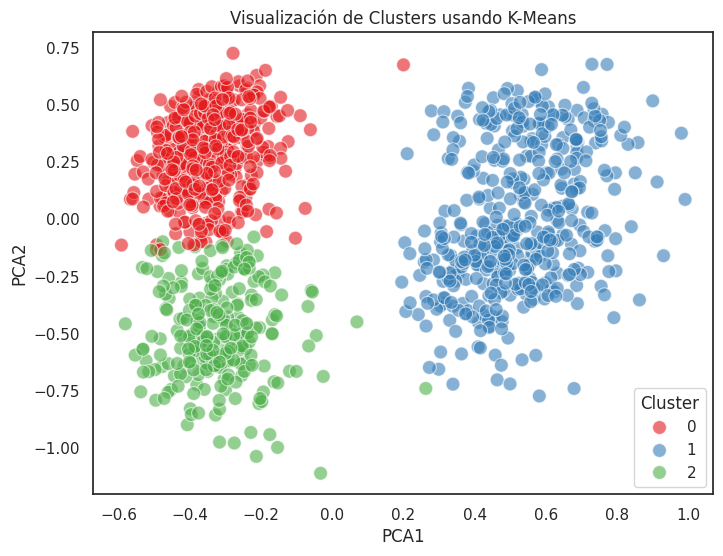

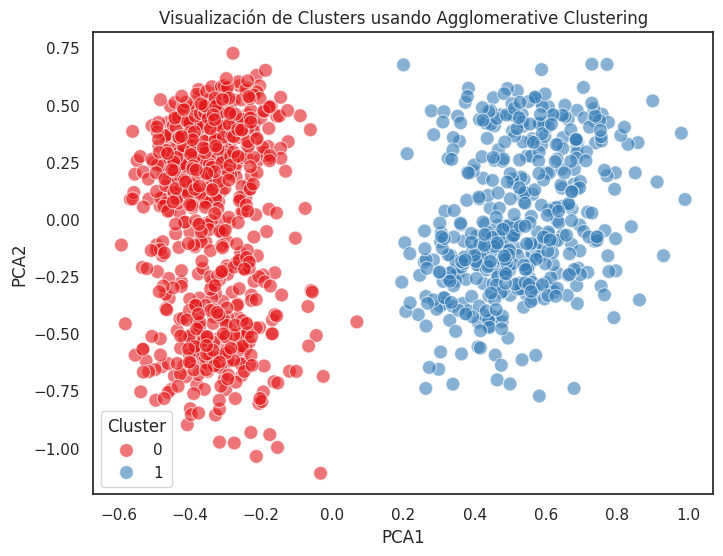

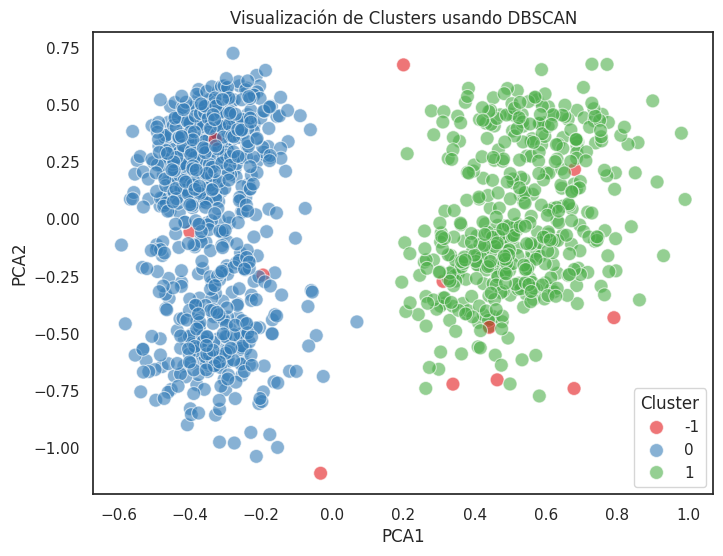

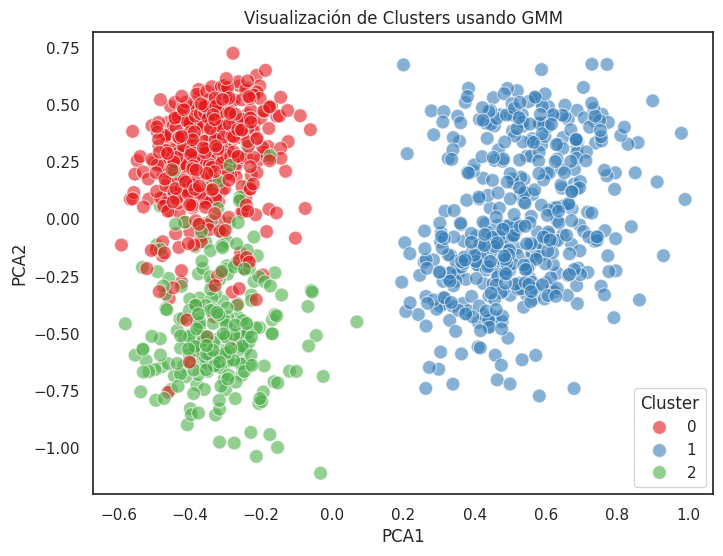

Silhouette Score para K-Means: 0.31376778441459613
Silhouette Score para DBSCAN: 0.3083064939468532
Silhouette Score para Agglomerative Clustering: 0.31367598226786225
Silhouette Score para GMM: 0.28436390496367414


In [ ]:
# Función para graficar los clusters
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = labels
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.6)
    plt.title(title)
    plt.show()

# Realizamos la reducción de dimensionalidad con PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)
plot_clusters(X_pca, clusters_kmeans, 'Visualización de Clusters usando K-Means')

# 2. Agglomerative Clustering (Jerárquico)
agglomerative = AgglomerativeClustering(n_clusters=2)
clusters_agglo = agglomerative.fit_predict(X)
plot_clusters(X_pca, clusters_agglo, 'Visualización de Clusters usando Agglomerative Clustering')

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X)
plot_clusters(X_pca, clusters_dbscan, 'Visualización de Clusters usando DBSCAN')

# 4. Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X)
plot_clusters(X_pca, clusters_gmm, 'Visualización de Clusters usando GMM')

# Comparación de Silhouette Scores
silhouette_kmeans = silhouette_score(X, clusters_kmeans)
silhouette_dbscan = silhouette_score(X, clusters_dbscan) if len(set(clusters_dbscan)) > 1 else -1
silhouette_agglo = silhouette_score(X, clusters_agglo)
silhouette_gmm = silhouette_score(X, clusters_gmm)

print(f"Silhouette Score para K-Means: {silhouette_kmeans}")
print(f"Silhouette Score para DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score para Agglomerative Clustering: {silhouette_agglo}")
print(f"Silhouette Score para GMM: {silhouette_gmm}")


## Análisis de resultados

* ***K-Means:*** Los clusters están bien separados en tres grupos distintos (rojo, verde y azul), lo que indica que el algoritmo agrupó bien los datos. K-Means optimiza la distancia a los centroides de cada cluster, funcionando mejor cuando los clusters tienen formas esféricas. El Silhouette Score de 0.31 confirma que los clusters están razonablemente separados. Sin embargo, K-Means puede ser sensible a outliers.

* ***Agglomerative Clustering:*** Se distinguen dos clusters principales: uno rojo y otro azul. El algoritmo jerárquico ha agrupado los datos en dos grandes grupos bien diferenciados. La separación de los clusters es muy clara, lo que indica que los puntos en cada cluster están bien agrupados. Su Silhouette Score de 0.30, muestra una buena separación

* ***DBSCAN***: Se observan dos clusters principales (verde y azul), con puntos etiquetados como -1 que representan ruido (outliers). DBSCAN agrupa los puntos basándose en densidades locales, lo que le permite formar clusters con formas arbitrarias y manejar outliers. El Silhouette Score de 0.31 indica una buena separación, aunque menor que K-Means. DBSCAN es útil para datos con variaciones de densidad o ruido.

* ***GMM***: Los clusters no parecen estar tan claramente definidos como en los otros métodos. Aunque se identifican tres grupos principales (posiblemente en tonos de azul, verde y rojo), se observa cierta superposición entre los clusters. Esto es característico de GMM, ya que asigna probabilidades a los puntos para pertenecer a varios clusters en lugar de asignarlos exclusivamente a uno. Este comportamiento coincide con el Silhouette Score más bajo de 0.28, lo que sugiere que la separación entre los clusters no es tan clara como en K-Means o Agglomerative Clustering

---
# Conclusiones
---

## Discusión final de resultados

Dado que el objetivo principal de la Actividad 1 es experimentar con distintos tipos de clustering, después de analizar los resultados de los algoritmos de clustering, se ha decidido optar por **K-Means** como la mejor opción para este análisis. Esto se debe a que K-Means proporciona una clara separación de los datos en tres clusters bien definidos, como se puede observar en la visualización. Además, el Silhouette Score de 0.31 indica que los clusters generados están razonablemente bien separados, lo que sugiere una agrupación consistente y efectiva. Aunque otros algoritmos, como DBSCAN y Agglomerative Clustering, también mostraron buenos resultados, K-Means destaca por su capacidad de manejar los datos de manera eficiente.

## Partes útiles para siguiente actividad

**Partes útiles para aprendizaje supervisado**

*Datos meteorológicos:* Las variables de temperatura, precipitación y humedad, serían directamente reutilizables, ya que estas son altamente relevantes para entender la influencia del clima en la transmisión del dengue.

*Índice NDVI:* El índice de vegetación puede seguir siendo útil, ya que la cobertura vegetal y la humedad relacionada pueden impactar las condiciones favorables para la proliferación del mosquito vector del dengue.

*Fechas*: Esta variable podría ser de utilidad, para analizar si existe algún patrón en los días de la semana

**Partes que no se utilizarían en el aprendizaje supervisado**

El clustering agrupa los datos en clusters sin usar etiquetas o información previa sobre los resultados, mientras que en el aprendizaje supervisado se entrena un modelo para predecir una etiqueta específica basada en variables predictoras conocidas. Por lo tanto, los grupos generados por el clustering no aportan valor en esta nueva actividad, ya que el enfoque cambia de identificar patrones ocultos a predecir un valor numérico basado en variables meteorológicas y de vegetación.

Las variables que fueron eliminadas por su alta correlación tampoco deberían ser tomadas en cuenta, ya que contenían información redundante

## Trabajo futuro

ALguna de las mejoras que se podría mencionar son las siguientes:

* ***Técnicas más avanzadas***

Se podrían explorar modelos más sofisticados de aprendizaje supervisado, como Random Forests o Redes Neuronales, que podrían capturar interacciones más complejas entre las variables meteorológicas y los casos de contagio.

* ***Análisis temporal***

Incluir enfoques de series temporales para tener en cuenta la dependencia entre semanas consecutivas. Modelos como ARIMA o LSTM podrían ser útiles para predecir tendencias basadas en la evolución del clima y los casos de contagio a lo largo del tiempo.

* ***Validación cruzada***

Implementar técnicas más robustas de validación cruzada para asegurar la generalización del modelo y evitar el sobreajuste, dividiendo los datos en múltiples subconjuntos para entrenar y validar el modelo en varias iteraciones.

## Bibliografía

* Códigos ejecutados y trabajados en clase de Machine Learning - VIU
* Guía de ChatGPT